In [21]:
#import tensorflow as tf
import numpy as np
import pandas as pd
from pyAudioAnalysis import audioBasicIO #A
from pyAudioAnalysis import ShortTermFeatures #B
import matplotlib.pyplot as plt
import os #C
import librosa
import IPython.display

# pyAudioAnalysis로 오디오 파일 전처리

In [22]:
def preProcess( fileName ):
    [Fs, x] = audioBasicIO.read_audio_file(fileName) #A

    #B
    if( len( x.shape ) > 1 and  x.shape[1] == 2 ):
        x = np.mean( x, axis = 1, keepdims = True )
    else:
        x = x.reshape( x.shape[0], 1 )
    #C
    F, f_names = ShortTermFeatures.feature_extraction(
        x[ :, 0 ],
        Fs, 0.050*Fs,
        0.025*Fs
    )
    
    return F

In [4]:
audio1=preProcess("C:/ffmpeg/bin/input/ Maroon 5 - Moves Like Jagger(0).wav")

# 크로마그램 특성 추출

In [23]:
def getChromagram( audioData ):
    
    # A
    temp_data =  audioData[ 21 ].reshape( 
        1, 
        audioData[ 21 ].shape[0] 
    )
    chronograph = temp_data
    
    # B
    for i in range( 22, 33 ):
        temp_data =  audioData[ i ].reshape( 
            1, 
            audioData[ i ].shape[0] 
        )
        chronograph = np.vstack( [ chronograph,  temp_data ] )
    
    return chronograph

In [6]:
audio1_chro=getChromagram(audio1)
audio1_chro

array([[1.18534937e-03, 1.53881079e-03, 8.36076202e-04, ...,
        1.21930807e-03, 3.34900316e-03, 2.41053633e-03],
       [4.27232191e-04, 2.03358163e-04, 3.78105784e-05, ...,
        2.38323635e-03, 8.97147940e-03, 7.33245400e-03],
       [9.27178906e-02, 1.14685701e-01, 1.09208635e-01, ...,
        6.37570527e-02, 4.58891760e-02, 5.39831247e-02],
       ...,
       [2.73244482e-03, 3.82245858e-03, 2.43317574e-03, ...,
        4.15475084e-03, 6.45019191e-03, 8.88543796e-03],
       [2.91841791e-02, 1.39751690e-02, 1.32070764e-02, ...,
        8.74041776e-03, 9.31509684e-03, 5.59624234e-03],
       [5.28038657e-04, 2.62532415e-04, 9.06863460e-05, ...,
        8.04693278e-04, 2.62212695e-03, 1.22695294e-03]])

In [24]:
def getNoteFrequency( chromagram ):
    
    numberOfWindows = chromagram.shape[1] #A
    
    freqVal = chromagram.argmax( axis = 0 ) #B
    
    histogram, bin = np.histogram( freqVal, bins = 12 ) #C
    
    normalized_hist = histogram.reshape( 1, 12 ).astype( float ) / numberOfWindows #D
    
    return normalized_hist

In [8]:
getNoteFrequency(audio1_chro)

array([[0.1509434 , 0.02515723, 0.        , 0.05031447, 0.        ,
        0.        , 0.42138365, 0.02515723, 0.        , 0.04402516,
        0.19496855, 0.08805031]])

In [25]:
fileList = []
def getDataset( filePath ):
    X = pd.DataFrame(  )
    
    columns=[ "G#", "G", "F#", "F", "E", "D#", "D", "C#", "C", "B", "A#", "A" ]
    
    for file in os.listdir(filePath):
        fileList.append( file )
        features = preProcess(filePath + "\\"+file )
        chromagram = getChromagram( features )
        noteFrequency = getNoteFrequency( chromagram )
        
        x_new =  pd.Series(noteFrequency[ 0, : ]) #2차원 배열로 되어있어서 1차원 12개 항목 배열로 바꾸어 추출
        X = pd.concat( [ X, x_new ], axis = 1 )
        print(file+" fin.")
        
    data = X.T.copy()
    data.columns = columns
    data.index = [ i for i in range( 0, data.shape[ 0 ] ) ]
            
    return data

# librosa로 전처리 결과(여러개 특성들로 구성)

In [22]:
os.chdir("C:\\ffmpeg\\bin\\input")

In [23]:
x, fs = librosa.load("C:/ffmpeg/bin/input/Ariana Grande - God is a woman(0).wav")
IPython.display.Audio(x, rate=fs)

In [24]:
X = librosa.feature.mfcc(x, sr=fs)
print(X)

[[-5.9043481e+02 -5.7993707e+02 -5.3346655e+02 ... -1.1286382e+02
  -1.0799652e+02 -1.0788198e+02]
 [ 0.0000000e+00  1.2093843e+01  4.8241287e+01 ...  6.5936630e+01
   6.7101379e+01  7.3879501e+01]
 [ 0.0000000e+00  6.6090899e+00  4.0533738e+00 ... -1.8159754e+01
  -2.5187246e+01 -2.4751808e+01]
 ...
 [ 0.0000000e+00 -3.1744938e+00 -1.0813580e+01 ... -4.1582327e+00
   1.3037122e+00 -1.0416759e+00]
 [ 0.0000000e+00 -5.0270176e-01 -4.4940853e+00 ...  1.4109539e+01
   1.7739246e+01  1.4768703e+01]
 [ 0.0000000e+00  3.5148442e+00  5.8881574e+00 ...  3.9788599e+00
   6.1127548e+00  4.9900436e+00]]


In [25]:
pca=PCA(n_components=2,whiten=True)
pca.fit(X)

NameError: name 'PCA' is not defined

In [ ]:
X_pca=pca.fit_transform(X)
X_pca

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1])

# PCA를 이용한 차원 축소(2차원으로)

In [26]:
from sklearn.decomposition import PCA

In [ ]:
audio1_pca=pca.fit_transform(temp_audio)
audio1_pca=audio1_pca[22:34]
print(audio1_pca)

In [ ]:
def pca(file):
    filePath="C:/ffmpeg/bin/input/"
    x=preProcess(filePath+file)
    temp_audio=preProcess(filePath+file)
    pca=PCA(n_components=1,whiten=True)
    pca.fit(temp_audio)
    audio_pca=pca.fit_transform(temp_audio)
    audio_pca=audio_pca[0]
    return audio_pca

In [ ]:
pca("Ariana Grande - God is a woman _ ITsMe waacking choreography dance.mp3(0).wav")

In [ ]:
plt.scatter(x_pca[:,0], x_pca[:,1])

In [ ]:
print(x_pca.explained_variance_ratio_)

In [ ]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=label,
            s=50, cmap='viridis');

# Convert DataFrame to CSV

In [29]:
data = getDataset("C:\\ffmpeg\\bin\\input")

 Maroon 5 - Moves Like Jagger(0).wav fin.
 Maroon 5 - Moves Like Jagger(1).wav fin.
 Maroon 5 - Moves Like Jagger(10).wav fin.
 Maroon 5 - Moves Like Jagger(11).wav fin.
 Maroon 5 - Moves Like Jagger(12).wav fin.
 Maroon 5 - Moves Like Jagger(13).wav fin.
 Maroon 5 - Moves Like Jagger(14).wav fin.
 Maroon 5 - Moves Like Jagger(15).wav fin.
 Maroon 5 - Moves Like Jagger(16).wav fin.
 Maroon 5 - Moves Like Jagger(17).wav fin.
 Maroon 5 - Moves Like Jagger(18).wav fin.
 Maroon 5 - Moves Like Jagger(19).wav fin.
 Maroon 5 - Moves Like Jagger(2).wav fin.
 Maroon 5 - Moves Like Jagger(20).wav fin.
 Maroon 5 - Moves Like Jagger(21).wav fin.
 Maroon 5 - Moves Like Jagger(22).wav fin.
 Maroon 5 - Moves Like Jagger(23).wav fin.
 Maroon 5 - Moves Like Jagger(24).wav fin.
 Maroon 5 - Moves Like Jagger(25).wav fin.
 Maroon 5 - Moves Like Jagger(26).wav fin.
 Maroon 5 - Moves Like Jagger(27).wav fin.
 Maroon 5 - Moves Like Jagger(28).wav fin.
 Maroon 5 - Moves Like Jagger(29).wav fin.
 Maroon 5 - Mo

KeyboardInterrupt: 

In [30]:
data

NameError: name 'data' is not defined

In [ ]:
data.to_csv("music_input_feature.csv", mode='w')

# 저장한 csv파일을 DataFrame으로 불러와서 읽기

In [10]:
music_data=pd.read_csv("music_input_feature.csv")
music_data

,G#,G,F#,F,E,D#,D,C#,C,B,A#,A
0,0.150943,0.025157,0.000000,0.050314,0.000000,0.000000,0.421384,0.025157,0.000000,0.044025,0.194969,0.088050
1,0.062893,0.000000,0.176101,0.031447,0.056604,0.000000,0.075472,0.396226,0.012579,0.012579,0.119497,0.056604
2,0.012579,0.465409,0.006289,0.000000,0.000000,0.056604,0.371069,0.000000,0.000000,0.006289,0.012579,0.069182
3,0.421384,0.012579,0.000000,0.006289,0.056604,0.000000,0.402516,0.018868,0.000000,0.025157,0.006289,0.050314
4,0.081761,0.012579,0.000000,0.000000,0.037736,0.735849,0.000000,0.000000,0.018868,0.025157,0.075472,0.012579
...,...,...,...,...,...,...,...,...,...,...,...,...
7048,0.207547,0.000000,0.113208,0.000000,0.006289,0.591195,0.000000,0.000000,0.025157,0.000000,0.044025,0.012579
7049,0.075472,0.050314,0.182390,0.000000,0.062893,0.352201,0.000000,0.000000,0.075472,0.006289,0.075472,0.119497
7050,0.018868,0.000000,0.012579,0.081761,0.119497,0.025157,0.345912,0.012579,0.006289,0.050314,0.320755,0.006289
7051,0.025157,0.163522,0.000000,0.069182,0.000000,0.000000,0.672956,0.012579,0.012579,0.018868,0.018868,0.006289


# KMeans 적용하기

In [11]:
from sklearn.cluster import KMeans
n_clusters=8
model = KMeans(n_clusters)
model.fit(music_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
data_labels=model.predict(music_data)

In [13]:
import collections
print(collections.Counter(data_labels))
data_labels

Counter({0: 1676, 5: 1323, 2: 1058, 6: 887, 3: 811, 1: 649, 4: 327, 7: 322})


array([3, 6, 4, ..., 5, 3, 3])

In [15]:
print (model.inertia_)

486.92487815209165


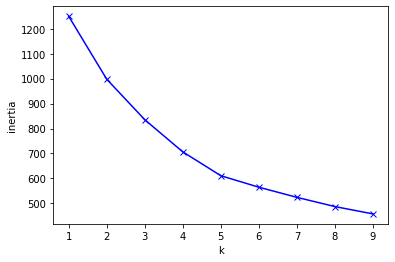

In [16]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(music_data)
    kmeanModel.fit(music_data)
    inertia.append(kmeanModel.inertia_)
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [28]:
print(len(data_labels),len(fileList))

7053 0


In [27]:
final_labels = pd.DataFrame( { "Labels": data_labels, "File Names(id)": fileList } )
final_labels

ValueError: arrays must all be same length

In [18]:
filtering_label=final_labels['Labels']==2

In [19]:
filt=final_labels[filtering_label]
filt

,Labels,File Names(id)
41,2,41
49,2,49
51,2,51
65,2,65
68,2,68
...,...,...
6984,2,6984
6994,2,6994
7002,2,7002
7005,2,7005


In [20]:
filt_array = filt.values
filt_array

array([[   2,   41],
       [   2,   49],
       [   2,   51],
       ...,
       [   2, 7002],
       [   2, 7005],
       [   2, 7006]], dtype=int64)

In [1]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(tdm[0], tdm[1])